https://surfer.nmr.mgh.harvard.edu/fswiki/ReconAllOutputFiles


## ReconAll Output File Descriptions

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import nipy
import nibabel
import pandas as pd

In [2]:
from nipype.interfaces.ants import CompositeTransformUtil



## 1) 001.mgz: Misma imagen de entrada con craneo
/mri/orig
001.mgz
The input to recon-all (i.e. the MPRAGE) gets converted to the mgz file format using mri_convert and is called 001.mgz. If you ever wanted to start over and rerun this subject from scratch, you only need the files in the orig directory to do so (and not the dicoms). Be sure to copy the entire directory structure elsewhere so that you have: subj001/mri/orig/001.mgz all together before you run: recon-all -all -s subj001


In [188]:
img = nibabel.load('001.mgz')

In [189]:
type(img)

nibabel.freesurfer.mghformat.MGHImage

In [190]:
img.shape

(176, 256, 256)

In [191]:
nibabel.is_proxy(img.dataobj)

True

In [192]:
image_data = img.get_fdata()
image_data.shape

(176, 256, 256)

In [193]:
p=np.asarray(image_data)
p.shape

(176, 256, 256)

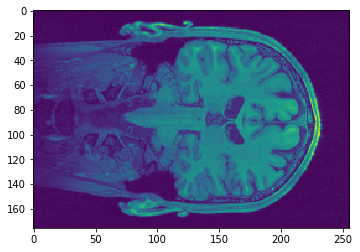

In [9]:
# Selecciona una sola seccion de un numpy array
n=p[:,100,:]
plt.imshow(n)
plt.show()

In [10]:
k=np.unique(p)
len(k)

44427

002.mgz
Occassionally some datasets have a second structural run which is converted to mgz format and called 002.mgz (and if there's a third run it'll be called 003.mgz etc..) and saved in subj001/mri/orig/ directory.

T1raw.mgz
FLAIRraw.mgz



## 2) /mri: este es el archivo que se genera después de promediar (si hay más de 1 ejecución) los volúmenes en mri / orig /. Si solo hay una ejecución, entonces el archivo rawavg.mgz será el mismo que 001.mgz. Este es el volumen no conformado.
orig.mgz
Esta es la salida conformada de rawavg.mgz como resultado de ejecutar mri_convert.
rawavg.mgz
this is the file that's generated after averaging (if there are more than 1 run) the volumes in mri/orig/ . If there's just one run, then the rawavg.mgz file will be the same as 001.mgz. This is unconformed volume.
orig.mgz
This is the conformed output of rawavg.mgz as a result of running mri_convert.
##

In [202]:
## wmparc, aparc+aseg, mejores resultados

img = nibabel.load('wmparc.mgz')
#img = nibabel.load('/home/pedro/Documents/freesurfer/freesurfer/subjects/bert/mri/gmparc.mgz')
#img = nibabel.load('/home/pedro/Documents/freesurfer/freesurfer/subjects/bert/mri/brainmask.mgz')
#img = nibabel.load('/home/pedro/Documents/freesurfer/freesurfer/subjects/bert/mri/aseg.mgz')

In [203]:
img.shape

(256, 256, 256)

In [204]:
image_data = img.get_fdata()
image_data.shape

(256, 256, 256)

In [205]:
p=np.asarray(image_data)
p.shape

(256, 256, 256)

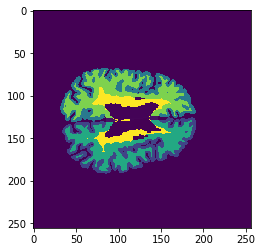

In [206]:
# Selecciona una sola seccion de un numpy array
n=p[:,100,:]
plt.imshow(n)
plt.show()

In [180]:
# Se tiene el array 3d con todos los valores segmentados
k=np.unique(p)
len(k)

181

In [214]:
#Pone true en el valor seleccionado
#
#mask=p== [251 or 252 or 253 or 254 or 255] #CorpusCallosum
#mask=p==[7 or 8 or 16 or 46 or 47] #Cerebellum
mask=p==[17 or 53] # Hippocampus
#mask=p==[1003]#ctx-lh-caudalmiddlefrontal
#mask=p==[1003]#ctx-rh-paracentral
#mask=p==[2035]#ctx-rh-insula

#mask=p==[85] # verdadero para la zona en cuestión
#Poner 1 en los voxeles donde se hizo match (true) únicamente y cero en el resto (pandas)
n=mask.astype(np.int)

In [10]:
np.place(p, mask, 100)
p[0,0,0]

0.0

In [141]:
#toma lo que hay en "valor" y lo resalta con un númerp 500, el resto de cerebro lo toma en 100
#np.place usa el array, mascara y valor a asignar
valuePart= [7 or 8 or 16 or 46 or 47]

mask=np.logical_and(p!=0, p!=valuePart)
np.place(p, mask, 100)
np.place(p, p==valuePart, 500)

In [113]:
p[0,0,0]



0.0

In [207]:
k=np.unique(p)
len(k)

181

In [208]:
n=p

In [143]:
np.unique(p)

array([  0., 100., 500.])

In [504]:
np.unique(n)

array([0, 1])

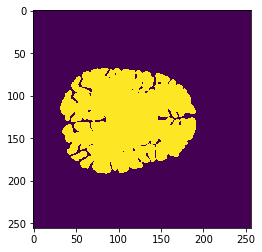

In [15]:
# Selecciona una sola seccion de un numpy array
d=n[:,100,:]
plt.imshow(d)
plt.show()

In [215]:

from mayavi import mlab
src = mlab.pipeline.scalar_field(n)
mlab.pipeline.iso_surface(src, contours=[n.min()+0.1*n.ptp(), ], opacity=0.3)
mlab.pipeline.iso_surface(src, contours=[n.max()-0.1*n.ptp(), ],)

mlab.show()

In [474]:
import numpy as np
import mayavi

In [209]:
from tvtk.api import tvtk, write_data
grid = tvtk.ImageData(spacing=(10, 5, -10), origin=(100, 350, 200), 
                      dimensions=n.shape)
grid.point_data.scalars = np.ravel(n, order='F')
grid.point_data.scalars.name = 'Test Data'
# Writes legacy ".vtk" format if filename ends with "vtk", otherwise
# this will write data using the newer xml-based format.
write_data(grid, 'test.vtk')

In [59]:
i = tvtk.ImageData(spacing=(1, 1, 1), origin=(0, 0, 0))
i.point_data.scalars = n.ravel()
i.point_data.scalars.name = 'scalars'
i.dimensions = n.shape


write_data(i, 'vtktest.vtk')

In [58]:
import numpy as np
from tvtk.api import tvtk, write_data

data = np.random.random((10,10,10))

grid = tvtk.ImageData(spacing=(10, 5, -10), origin=(100, 350, 200), 
                      dimensions=n.shape)
grid.point_data.scalars = np.ravel(n, order='F')
grid.point_data.scalars.name = 'Test Data'

# Writes legacy ".vtk" format if filename ends with "vtk", otherwise
# this will write data using the newer xml-based format.
write_data(grid, 'nn1.vtk')

In [89]:
# convert it to stacked format using Pandas
nArray=p

stacked = pd.Panel(nArray.swapaxes(1,2)).to_frame().stack().reset_index()
stacked.columns = ['x', 'y', 'z', 'value']
#Elimina aquellos valores de 0
sta=stacked.loc[stacked['value'] != 0]

#save to disk
sta.to_csv('brainmask.csv', index=False)

/home/pedro/python3.5/p3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3267: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)



## 3) orig.mgz: Esta es la salida conformada de rawavg.mgz como resultado de ejecutar mri_convert. ( parece tener craneo y no estar segmentado)
orig.mgz
This is the conformed output of rawavg.mgz as a result of running mri_convert.


In [22]:
img = nibabel.load('orig.mgz')

In [23]:
img.shape

(256, 256, 256)

In [24]:
image_data = img.get_fdata()
image_data.shape

(256, 256, 256)

In [32]:
p=np.asarray(image_data)
p.shape

(256, 256, 256)

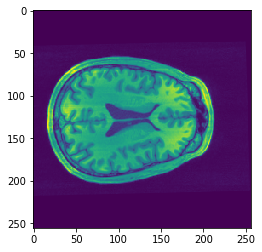

In [47]:
# Selecciona una sola seccion de un numpy array
n=p[:,100,:]
plt.imshow(n)
plt.show()

In [26]:
k=np.unique(p)
len(k)

256

In [33]:
#n=p==[41 or 46]
mask=p== [85] #CorpusCallosum

In [34]:
mask.shape

(256, 256, 256)

In [186]:
n=n.astype(np.int)

In [187]:
n.shape

(256, 256, 256)

In [35]:
np.unique(n)

array([False,  True])

In [35]:
np.place(p, mask, 100)

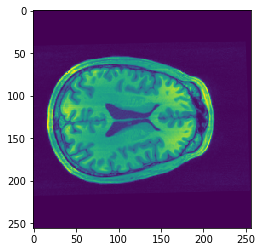

In [36]:
# Selecciona una sola seccion de un numpy array
n=p[:,100,:]
plt.imshow(n)
plt.show()

In [31]:
k=np.unique(p)
len(k)

255

In [11]:
from mayavi import mlab
src = mlab.pipeline.scalar_field(n)
mlab.pipeline.iso_surface(src, contours=[n.min()+0.1*n.ptp(), ], opacity=0.3)
mlab.pipeline.iso_surface(src, contours=[n.max()-0.1*n.ptp(), ],)

mlab.show()

AttributeError: 'NoneType' object has no attribute 'min'


## 4) /surf
?h.orig.nofix
?h.smoothwm.nofix
?h.inflated.nofix
?h.qsphere.nofix
?h.orig
?h.inflated
?h.sphere
?h.pial
?h.thickness

In [76]:
img=nibabel.freesurfer.io.read_morph_data('lhcurv.nii')
img.shape


(145069,)

In [75]:
k=np.unique(img)
len(k)

138928


## ) NU.MGZ. Entrada a Volume based proccessing

In [3]:

img = nibabel.load('/home/pedro/Documents/freesurfer/freesurfer/subjects/bert/mri/nu.mgz')

In [4]:
img.shape

(256, 256, 256)

In [5]:
image_data = img.get_fdata()
image_data.shape

(256, 256, 256)

In [6]:
p=np.asarray(image_data)
p.shape

(256, 256, 256)

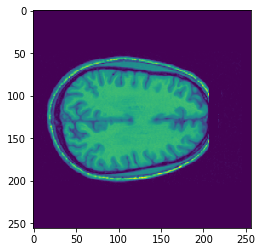

In [7]:
# Selecciona una sola seccion de un numpy array
n=p[:,100,:]
plt.imshow(n)
plt.show()

In [8]:
k=np.unique(p)
len(k)

196

In [4]:
img = nibabel.load('/home/pedro/Documents/freesurfer/freesurfer/subjects/bert/mri/brainmask.mgz')

In [5]:
img.shape

(256, 256, 256)

In [6]:
image_data = img.get_fdata()
image_data.shape

(256, 256, 256)

In [7]:
p=np.asarray(image_data)
p.shape

(256, 256, 256)

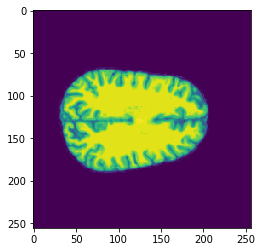

In [13]:
# Selecciona una sola seccion de un numpy array
n=p[:,100,:]
plt.imshow(n)
plt.show()


In [140]:
#toma lo que hay en "valor" y lo resalta con un númerp 500, el resto de cerebro lo toma en 100
#np.place usa el array, mascara y valor a asignar
valuePart= [7 or 8 or 16 or 46 or 47]

mask=np.logical_and(p!=0, p!=valuePart)
np.place(p, mask, 100)
np.place(p, p==valuePart, 500)

In [8]:
#Pone true en el valor seleccionado
#
mask=p== [251 or 252 or 253 or 254 or 255] #CorpusCallosum

In [9]:
np.place(p, mask, 100)


In [167]:
np.unique(p)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [10]:
n=p
from mayavi import mlab
src = mlab.pipeline.scalar_field(n)
mlab.pipeline.iso_surface(src, contours=[n.min()+0.1*n.ptp(), ], opacity=0.3)
mlab.pipeline.iso_surface(src, contours=[n.max()-0.1*n.ptp(), ],)

mlab.show()

In [119]:
img = nibabel.load('/home/pedro/Documents/freesurfer/freesurfer/subjects/bert/mri/aseg.mgz')

In [120]:
img.shape

(256, 256, 256)

In [121]:
image_data = img.get_fdata()
image_data.shape

(256, 256, 256)

In [122]:
p=np.asarray(image_data)
p.shape

(256, 256, 256)

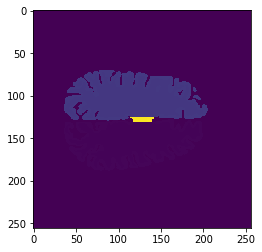

In [56]:
# Selecciona una sola seccion de un numpy array
n=p[:,100,:]
plt.imshow(n)
plt.show()

In [123]:
k=np.unique(p)
len(k)

44

In [177]:
n=p
from mayavi import mlab
src = mlab.pipeline.scalar_field(n)
mlab.pipeline.iso_surface(src, contours=[n.min()+0.1*n.ptp(), ], opacity=0.3)
mlab.pipeline.iso_surface(src, contours=[n.max()-0.1*n.ptp(), ],)

mlab.show()

In [22]:
img = nibabel.load('/home/pedro/Documents/freesurfer/freesurfer/subjects/bert/mri/brain.mgz')

In [23]:
img.shape     

(256, 256, 256)

In [24]:
image_data = img.get_fdata()
image_data.shape

(256, 256, 256)

In [25]:
p=np.asarray(image_data)
p.shape

(256, 256, 256)

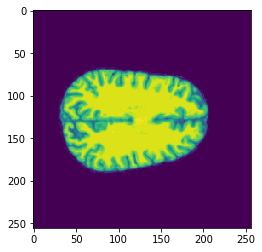

In [26]:
# Selecciona una sola seccion de un numpy array
n=p[:,100,:]
plt.imshow(n)
plt.show()

In [27]:
k=np.unique(p)
len(k)

181

In [28]:
img = nibabel.load('/home/pedro/Documents/freesurfer/freesurfer/subjects/bert/mri/wm.mgz')

In [29]:
img.shape

(256, 256, 256)

In [30]:
image_data = img.get_fdata()
image_data.shape

(256, 256, 256)

In [31]:
p=np.asarray(image_data)
p.shape

(256, 256, 256)

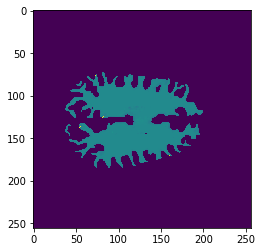

In [32]:
# Selecciona una sola seccion de un numpy array
n=p[:,100,:]
plt.imshow(n)
plt.show()

In [33]:
k=np.unique(p)
len(k)

52

In [34]:
n=p
from mayavi import mlab
src = mlab.pipeline.scalar_field(n)
mlab.pipeline.iso_surface(src, contours=[n.min()+0.1*n.ptp(), ], opacity=0.3)
mlab.pipeline.iso_surface(src, contours=[n.max()-0.1*n.ptp(), ],)

mlab.show()

In [35]:
img = nibabel.load('/home/pedro/Documents/freesurfer/freesurfer/subjects/bert/mri/filled.mgz')

In [36]:
img.shape

(256, 256, 256)

In [37]:
image_data = img.get_fdata()
image_data.shape

p=np.asarray(image_data)
p.shape


(256, 256, 256)

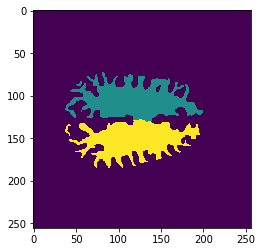

In [38]:
# Selecciona una sola seccion de un numpy array
n=p[:,100,:]
plt.imshow(n)
plt.show()

In [39]:
k=np.unique(p)
len(k)

3

In [40]:
n=p
from mayavi import mlab
src = mlab.pipeline.scalar_field(n)
mlab.pipeline.iso_surface(src, contours=[n.min()+0.1*n.ptp(), ], opacity=0.3)
mlab.pipeline.iso_surface(src, contours=[n.max()-0.1*n.ptp(), ],)

mlab.show()

In [41]:
img = nibabel.load('/home/pedro/Documents/freesurfer/freesurfer/subjects/bert/mri/orig.mgz')

In [42]:
img.shape

(256, 256, 256)

In [43]:
image_data = img.get_fdata()
image_data.shape

(256, 256, 256)

In [44]:
p=np.asarray(image_data)
p.shape

(256, 256, 256)

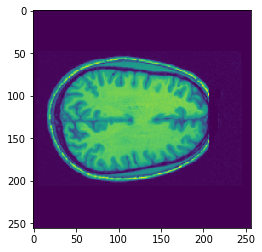

In [45]:
# Selecciona una sola seccion de un numpy array
n=p[:,100,:]
plt.imshow(n)
plt.show()

In [46]:
k=np.unique(p)
len(k)

256

In [47]:
img = nibabel.load('/home/pedro/Documents/freesurfer/freesurfer/subjects/bert/mri/T1.mgz')

In [48]:
img.shape


image_data = img.get_fdata()
image_data.shape

p=np.asarray(image_data)
p.shape

(256, 256, 256)

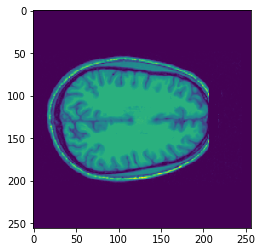

In [49]:
# Selecciona una sola seccion de un numpy array
n=p[:,100,:]
plt.imshow(n)
plt.show()

In [50]:
k=np.unique(p)
len(k)

199

In [156]:
from skimage import  measure

In [216]:
## Generar el archivo .obj desde el array "p"
##verts, faces, normals, values = measure.marching_cubes_lewiner(p, 0)
verts, faces, normals, values = measure.marching_cubes_lewiner(n, 0)
faces=faces +1

In [217]:
thefile = open('hiposmall.obj', 'w')
for item in verts:
  thefile.write("v {0} {1} {2}\n".format(item[0],item[1],item[2]))

#for item in normals:
#  thefile.write("vn {0} {1} {2}\n".format(item[0],item[1],item[2]))

for item in faces:
  thefile.write("f {2}//{2} {1}//{1} {0}//{0}\n".format(item[0],item[1],item[2]))  

thefile.close()



##thefile.write("f {0}//{0} {1}//{1} {2}//{2}\n".format(item[0],item[1],item[2]))
##to
##thefile.write("f {2}//{2} {1}//{1} {0}//{0}\n".format(item[0],item[1],item[2]))